# U.S. Medical Insurance Costs

charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


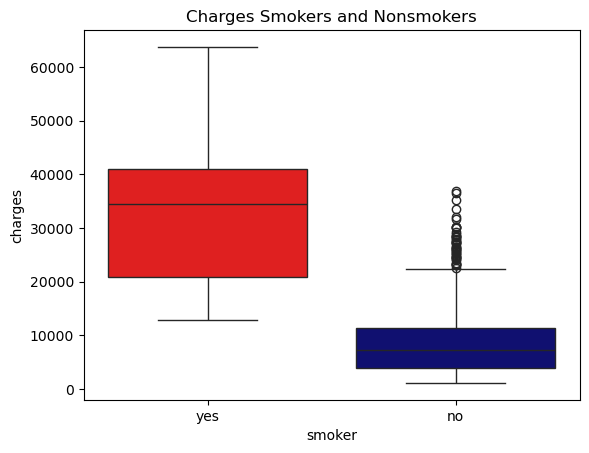

Dependency the feature from each factor: 
Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
[  256.85635254   339.19345361   475.50054515  -131.3143594
 23848.53454191  -352.96389942 -1035.02204939  -960.0509913 ]


<Figure size 640x480 with 0 Axes>

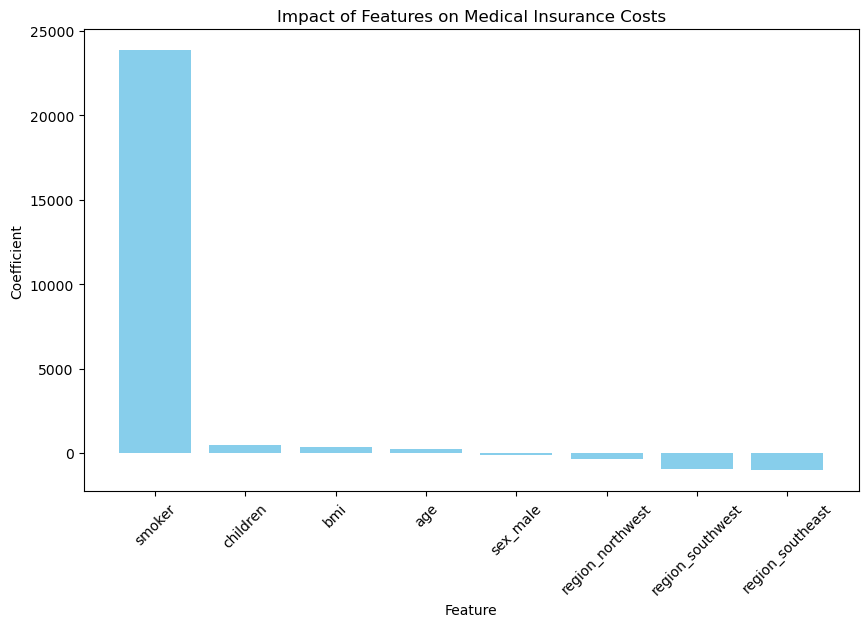

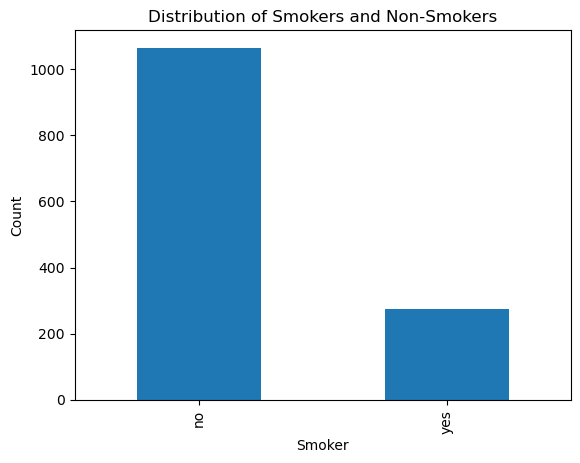

<Figure size 640x480 with 0 Axes>

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv('insurance.csv')

# Convert categorical variables to numerical
df_encoded = pd.get_dummies(df, drop_first=True)

# Check data
# print(df_encoded.info())
# print(df_encoded.describe())

# Correlation matrix
corr_matrix = df_encoded.corr()
print(corr_matrix['charges'].sort_values(ascending=False))

# Visualize using original DataFrame
sns.boxplot(x='smoker', y='charges', hue='smoker', data=df, palette={'yes': 'red', 'no': 'navy'}, dodge=False)
plt.title('Charges Smokers and Nonsmokers')
plt.savefig('Smokers_vs_Nonsmokers_distrib.png')
plt.show()
plt.clf()
# Feature importance using a model
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
model = LinearRegression()
model.fit(X, y)
print("Dependency the feature from each factor: ")

print(X.columns)
print(model.coef_)

# Дивимось вплив по категоріям на величину внесків
data = {
    'feature': ['age', 'bmi', 'children', 'sex_male', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest'],
    'coefficient': [256.85635254, 339.19345361, 475.50054515, -131.3143594, 23848.53454191, -352.96389942, -1035.02204939, -960.0509913]
}
df_tab = pd.DataFrame(data)

# Відсортувати за коефіцієнтами
sorted_df = df_tab.sort_values(by='coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_df['feature'], sorted_df['coefficient'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Impact of Features on Medical Insurance Costs')
plt.xticks(rotation=45)
plt.savefig('Categories_distribution.png')
plt.show()
plt.clf()

# Виявляємо упередженість серед курців і некурців
smoker_counts = df['smoker'].value_counts()

# Візуалізація розподілу
smoker_counts.plot(kind='bar')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Distribution of Smokers and Non-Smokers')
plt.show()
plt.clf()
